# Presentation Biomarker
------------------------------------

In [1]:
# So that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# https://matplotlib.org/stable/users/explain/interactive.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/ipympl/installing.html 
%matplotlib widget

import functions 
from importlib import reload
reload(functions)
from functions import *


Initialisation
Initialisation


In [2]:
BMu_nb = 97  # Number of the BMu
author = '' # _Name of the keys in the Biomarker_dictionnary ex: _norm
key = 'BMu'+str(BMu_nb)+author

# one subject for testing
subject = 12
session = 'INI'
trial = 1

try:
    print(get_last_nb(BMu_nb,author)) #get the last number of the computation trial
except:
    pass
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict[key]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs 

10


(<function functions.Biomarker_function.BMu97(emg, event, sub_MVIC=None, sub_MVIC_event=None, show=False, **kwargs)>,
 <function functions.Biomarker_function.preprocessing_lima_2018(emg)>,
 ['L_ESI', 'R_ESI'],
 'Weight_Unconstrained',
 False,
 '',
 True,
 True,
 '',
 {})

In [32]:
plt.close('all')

## Computation on one subject
------------------------------

### Loading of the data

In [3]:
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0], 'session':session,'subject':subject}


if event_computation: event = load_event_subject_mvt_session2(subject,task,session,n=trial)
else: event = None
if mvc_computation:
    sub_MVIC = load_file_subject_mvt_session2(subject,mvc_task,session,n=trial)[muscles[0]]

    try:
        sub_MVIC_event = load_event_subject_mvt_session2(subject,mvc_task,session,n=trial)
    except Exception as e:
        print(e)
        sub_MVIC_event = pd.DataFrame(data=None,columns=['event','time_sec','time_min'])

else : sub_MVIC,sub_MVIC_event = None,None

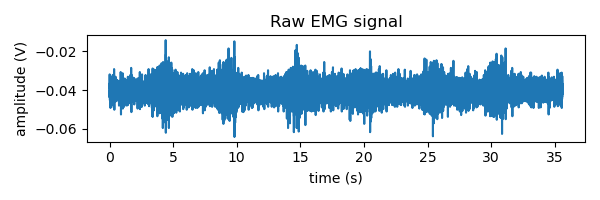

In [4]:
plot_1_channel_emg(emg,plot_title='Raw EMG signal')

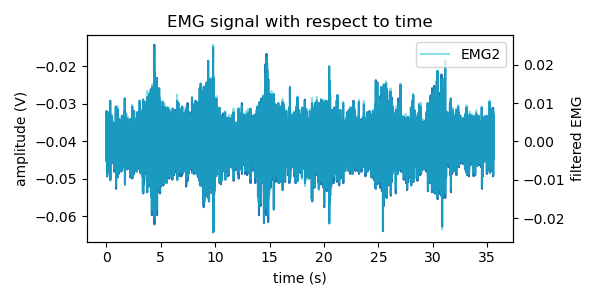

In [5]:
filtered_emg = preprocessing(emg)
if preprocessing:
    plot_2_channel_emg(emg,filtered_emg,one_axe=False,al=0.5)

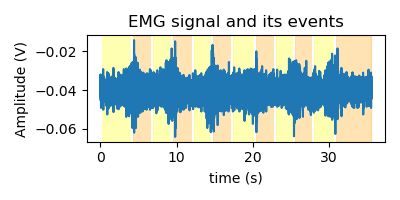

In [6]:
if event_computation:
    event_line = extract_event(emg,event,task_name=task, show=True,event_type=event_type)

In [7]:
if mvc_computation:
    event_line_mvc = extract_event(sub_MVIC,sub_MVIC_event,event_type='MVC',task_name= mvc_task if mvc_computation else task,show=True)
    plot_2_channel_emg(event_line_mvc,sub_MVIC)
    # c = get_data_c3d(subject, name = mvc_task,ini_rel=session)
    # np.array(list(zip(c['parameters']['EVENT']['LABELS']['value'],list(c['parameters']['EVENT']['TIMES']['value'][1]))))

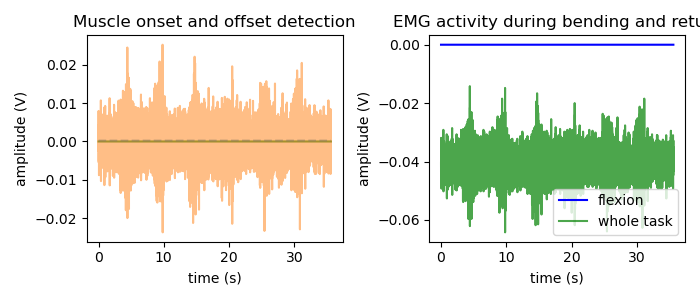

In [8]:
if contraction_computation: #parameters have to be changed ! and a preprocessing added for Lima
    emg_contraction = filtered_emg
    output, state_contraction, threshold_amp, number_onset_offset = double_threshold(emg_contraction,win = 0.3, time_win = 0.2,number_mean= 2, number_std = 0,baseline = [])


    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,3))
    t1 = np.arange(len(emg_contraction))/SAMPLING_RATE
    ax1.plot(t1, state_contraction*threshold_amp,alpha = 0.7,color = 'green')
    ax1.plot(t1,np.ones_like(t1)*threshold_amp, alpha = 0.5, linestyle='--')
    ax1.plot(t1, emg_contraction,alpha = 0.5)
    ax1.set(xlabel='time (s)', ylabel='amplitude (V)', title ='Muscle onset and offset detection')

    emg_on = emg.copy()
    emg_on[state_contraction==0] = 0
    ax2.plot(np.arange(len(emg_contraction))/SAMPLING_RATE,emg_on, color = 'blue', label= 'flexion')
    ax2.plot(np.arange(len(emg_contraction))/SAMPLING_RATE, emg,alpha = 0.7,color = 'green', label = 'whole task')
    ax2.set(xlabel='time (s)', ylabel='amplitude (V)', title ='EMG activity during bending and return')
    ax2.legend()
    
    fig.tight_layout()

### BMu computation for one subject

In [9]:
# BMu_patients_all_channel_averaged(BMu_function,preprocessing_neblett_2014,44,True, False, 'Trunk_Forward','',muscles,session=['INI']) # Neblett

In [10]:
try:
    BMu_values,BMu_detailed,BMu_error  = load_results_presentation(BMu_nb,author=author)
    print(f'The shape of the table for BMu values is {BMu_values.shape} \nThe shape of the table for the detailed values for each subphase is {BMu_detailed.shape} \nThe shape of the table containing the error that occured while computing the BMu is {BMu_error.shape}')
    print(f"{BMu_values.loc[list((BMu_values['subject']==subject) & (BMu_values['session']==session)).index(True),:]['value']:0.5f}")
except:
    print('Not computed yet')


The shape of the table for BMu values is (240, 8) 
The shape of the table for the detailed values for each subphase is (1482, 10) 
The shape of the table containing the error that occured while computing the BMu is (0, 6)
0.00365


In [11]:
output, detailed_output,output_rel = BMu_function(emg,event,sub_MVIC,sub_MVIC_event,**kwargs)

# Neblett
# output, detailed_output = BMu_function(filtered_emg,event,sub_MVIC,sub_MVIC_event,**kwargs)

try:
    print(f'The value of the biomarker is {output:0.5f} ')
except TypeError:
    print(f'The value of the biomarker is None ')

The value of the biomarker is 0.00365 


C:\Users\Anais\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [42]:
detailed_output

value      event  rep
0  -0.153549      slope    1
1  76.507688  intercept    1

In [43]:
output_rel

Measure Value
0      M1  None
1      M2  None
2      M3  None

## Computation for all participant
-------------------------------

In [44]:

BMu_results,BMu_result_detailed,BMu_result_detailed_rel,error =  BMu_patients_all_rel(BMu_function,BMu_nb,event_bool=event_computation,mvc_bool=mvc_computation,task=task,task_mvc=mvc_task,channel_BMu=muscles)

BMu118, 01, C ('INI', 'Endurance_Sorensen', 1, 'L_LES') : 81.0511
BMu118, 01, C ('INI', 'Endurance_Sorensen', 1, 'R_LES') : 77.0232
BMu118, 01, C ('REL', 'Endurance_Sorensen', 1, 'L_LES') : 90.5246
BMu118, 01, C ('REL', 'Endurance_Sorensen', 1, 'R_LES') : 88.0417
BMu118, 02, C ('INI', 'Endurance_Sorensen', 1, 'L_LES') : 82.1455
BMu118, 02, C ('INI', 'Endurance_Sorensen', 1, 'R_LES') : 89.0372
BMu118, 02, C ('REL', 'Endurance_Sorensen', 1, 'L_LES') : 75.8642
BMu118, 02, C ('REL', 'Endurance_Sorensen', 1, 'R_LES') : 82.0146
BMu118, 03, C ('INI', 'Endurance_Sorensen', 1, 'L_LES') : 66.6335
BMu118, 03, C ('INI', 'Endurance_Sorensen', 1, 'R_LES') : 63.7563
BMu118, 03, C ('REL', 'Endurance_Sorensen', 1, 'L_LES') : 53.0443
BMu118, 03, C ('REL', 'Endurance_Sorensen', 1, 'R_LES') : 75.5526
BMu118, 05, C ('INI', 'Endurance_Sorensen', 1, 'L_LES') : 101.0691
BMu118, 05, C ('INI', 'Endurance_Sorensen', 1, 'R_LES') : 95.5886
BMu118, 05, C ('REL', 'Endurance_Sorensen', 1, 'L_LES') : 94.9264
BMu118, 0

In [16]:
# Neblett reliability (ie: there is an averaging of the L_channel and R_channel)
# BMu_results,BMu_result_detailed,BMu_result_detailed_rel,error =  BMu_patients_all_rel_channel_averaged(BMu_function,preprocessing ,BMu_nb,event_bool=event_computation,mvc_bool=mvc_computation,task=task,task_mvc=mvc_task,channel_BMu=muscles)

In [45]:
desc = author + '' # Name of the table of results that will be saved ( by default name = BMu + nb + description from the dictionnary -> hence the empty string but anything can be added)
try:
    file_nb = get_last_nb(BMu_nb, desc) + 1
except:
    file_nb = 1
desc, file_nb # display the number of trial in which the BMu was computed

('_suter', 1)

In [46]:
Replace_bool = False 
if Replace_bool:
    x = input('Are you sure you want to replace ? [y,n]')
    if x =='y':
        file_nb -= 1
        print(file_nb)

In [47]:
save_BMu(BMu_results,f'BMu{BMu_nb}{desc}_{file_nb}',replace=Replace_bool)
save_BMu_detailed(BMu_result_detailed,f'BMu{BMu_nb}{desc}_{file_nb}',replace=Replace_bool)
save_BMu_detailed_rel(BMu_result_detailed_rel,f'BMu{BMu_nb}{desc}_{file_nb}',replace=Replace_bool)
save_BMu_error(error,f'BMu{BMu_nb}{desc}_{file_nb}',replace=Replace_bool)

file saved results\BMu118_suter_1_values.csv
file saved results\detailed\BMu118_suter_1_detailed.csv
file saved results\detailed_rel\BMu118_suter_1_rel.csv
file saved results\error\BMu118_suter_1_error.csv


# Quick stat and verif
----------------------

In [20]:
nb_BM = BMu_nb
all_files_value = glob(f'results\\BMu{str(nb_BM)}{desc}_[0-9]*.csv')
all_files_detailed = glob(f'results\\detailed\\BMu{str(nb_BM)}{desc}_[0-9]*.csv')
all_files_error = glob(f'results\\error\\BMu{str(nb_BM)}{desc}_[0-9]*.csv')

all_files_detailed[-1],all_files_error[-1],all_files_value[-1]

('results\\detailed\\BMu36_Du_norm_1_detailed.csv',
 'results\\error\\BMu36_Du_norm_1_error.csv',
 'results\\BMu36_Du_norm_1_values.csv')

In [21]:
BMu_detailed_csv,BMu_error_csv, BMu_values_csv = all_files_detailed[-1],all_files_error[-1],all_files_value[-1]

In [22]:
BMu_values = pd.read_csv( BMu_values_csv )
BMu_detailed = pd.read_csv( BMu_detailed_csv )
BMu_error = pd.read_csv( BMu_error_csv )


In [23]:
try:
    all_files_detailed_rel = glob(f'results\\detailed_rel\\BMu{str(nb_BM)}{desc}_[0-9]*.csv')
    BMu_detailed_rel_csv = all_files_detailed_rel[-1]
    BMu_detailed_rel =pd.read_csv(BMu_detailed_rel_csv)
except Exception as e:
    print(e)


In [24]:
BMu_P,BMu_C, std_p,std_c, mean_p,mean_c,mean_diff = extract_values_BMu_PC(BMu_values)
print(f'The mean value for patient is {mean_p:0.5f} +/- {std_p:0.5f} V,\nThe mean value for control is {mean_c:0.5f} +/- {std_c:0.5f} V. \nThus the difference between means is {abs(mean_diff):0.5f} V ')

The mean value for patient is 7.72854 +/- 11.00864 V,
The mean value for control is 6.77696 +/- 9.12310 V. 
Thus the difference between means is 0.95158 V 


In [25]:
np.round(np.nanmean(BMu_detailed_rel.loc[BMu_detailed_rel['Group']=='PAT','Value']),5),np.round(np.nanmean(BMu_detailed_rel.loc[BMu_detailed_rel['Group']=='CTR','Value']),5)

(7.72061, 6.77144)

In [26]:
print(BMu_values.shape, BMu_detailed.shape,BMu_error.shape)

(238, 8) (1460, 10) (1, 6)


In [27]:
BMu_error

error  subject session  \
0  Unable to load emg file 61 Endurance_Sorensen ...       61     INI   

            task trial channel  
0  Trunk_Forward   all     all

In [28]:
f"The number of empty values is : {BMu_values['value'].isnull().sum()}"

'The number of empty values is : 0'